In [1]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os

# Initialize COCO api for instance annotations
gt_coco = COCO('/home/prml/Dataset/coco2017/annotations/instances_val2017.json')
# pred_coco = COCO('/home/prml/StudentsWork/Chanyoung/MODU/result/atto/pred.json')

loading annotations into memory...
Done (t=0.47s)
creating index...
index created!


In [2]:
import json

# Read JSON file
with open("/home/prml/StudentsWork/Chanyoung/MODU/result/atto/pred.json", 'r') as f:
    pred = json.load(f)

In [3]:
len(pred)

5000

In [22]:
def get_pred_anns(pred, img_id, score_threshold=0.5):
    anns = []
    
    labels = pred[str(img_id)]['labels']
    bboxs = pred[str(img_id)]['boxes']
    scores = pred[str(img_id)]['scores']
    # print(labels)
    # print(bboxs)
    # print(scores)
    for label, bbox, score in zip(labels, bboxs, scores):
        if float(score) < score_threshold:
            continue
        bbox[2] -= bbox[0]
        bbox[3] -= bbox[1]
        anns.append({'category_id': int(label), 'bbox': bbox, 'score': float(score)})
    
    return anns

204871
---------------------


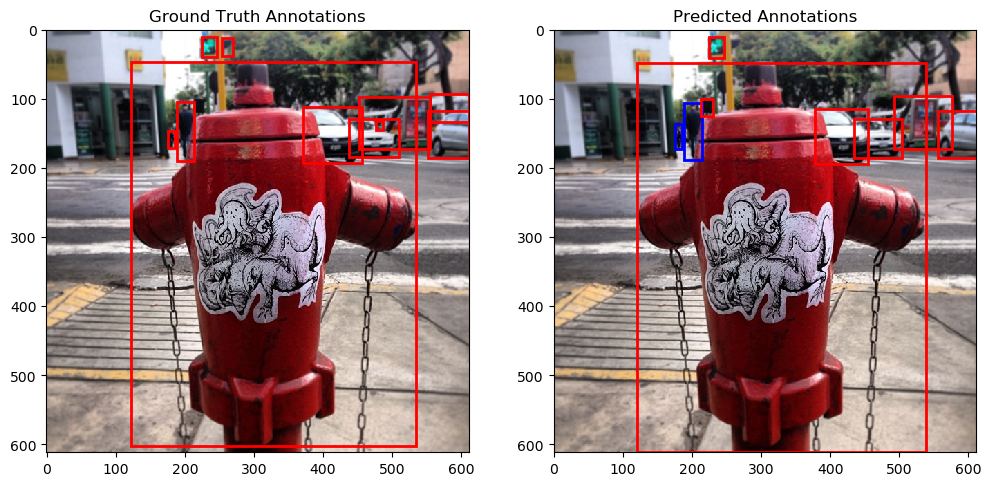

In [143]:
# Load and display a random image
catIds = gt_coco.getCatIds(catNms=['person'])
imgIds = gt_coco.getImgIds(catIds=catIds)
img = gt_coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]

# Load and display image from local path
image_path = os.path.join('/home/prml/Dataset/coco2017/val2017', img['file_name'])
image = plt.imread(image_path)

# Load and display instance annotations
gt_anns = gt_coco.loadAnns(gt_coco.getAnnIds(imgIds=img['id'], iscrowd=None))
print(img['id'])

# Show annotations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(image)
for ann in gt_anns:
    bbox = ann['bbox']
    # print(bbox)
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
    ax1.add_patch(rect)
ax1.set_title('Ground Truth Annotations')

pred_anns = get_pred_anns(pred, img['id'])
print('---------------------')
ax2.imshow(image)
# Define a color map for different category ids
color_map = {
    1: 'b',  # person
    18: 'g', # dog
    31: 'y', # handbag
    # Add more category ids and colors as needed
}

for ann in pred_anns:
    bbox = ann['bbox']
    category_id = ann['category_id']
    edgecolor = color_map.get(category_id, 'r')  # default to red if category_id not in color_map
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor=edgecolor, facecolor='none')
    ax2.add_patch(rect)
ax2.set_title('Predicted Annotations')

plt.show()
